## Problem Set for Lecture II: Advanced Fourier Analysis

Bryan Scott, CIERA/Northwestern,

Presented at DSFP Session 20: Time Series Methods in Astronomy

Exercises adapted and expanded from AstroML by  

version 0.1, February 16, 2024

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### Problem 1: Quick Simulated Data and Low Pass Filtering



Let's begin by generating a mock time series consisting of a Gaussian signal that we'd like to measure and a large noise term. 

In [5]:
import scipy.stats as stats

0.05
40000.0
20.0
[0.000e+00 2.000e+01 4.000e+01 ... 3.994e+04 3.996e+04 3.998e+04]


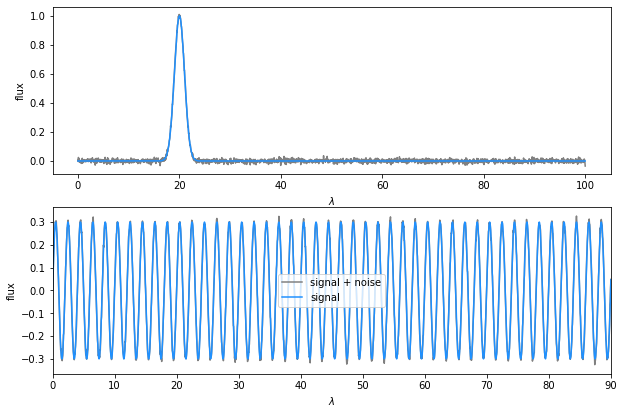

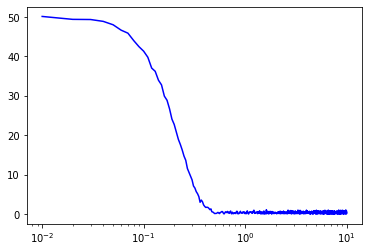

/var/folders/l8/2kslmt113c99klvtjpdbnghm0000gn/T/ipykernel_49862/3684374508.py:60: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 10)


(0.007079812002696427, 10)

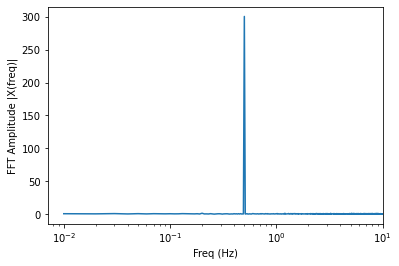

In [242]:
# Create the noisy data

np.random.seed(5)
N = 2000
dt = 0.05
noise = 0.01

print(dt)
print(N/dt)

t = dt * np.arange(N) #N evenly spaced samples dt apart 

sr = 1/dt # samples per interval 
print(sr)

freq = np.arange(N)/dt # N * 1/dt
print(freq)

freq = np.fft.fftfreq(N, dt)[1:N//2]

h1 = np.exp(-0.5 * ((t - 20.) / 1.0) ** 2)
h2 = 0.3*np.sin(2*np.pi*0.5*t)
hN1 = h1 + np.random.normal(0, noise, size=h1.shape)
hN2 = h2 + np.random.normal(0, noise, size=h2.shape)


fig = plt.figure(figsize=(10, 6.75))


# First plot: noisy signal
ax = fig.add_subplot(211)
ax.plot(t, hN1, '-', c='gray', label = 'signal + noise')
ax.plot(t, h1, c = 'dodgerblue', label = 'signal')

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('flux')

ax = fig.add_subplot(212)
ax.plot(t, hN2, '-', c='gray', label = 'signal + noise')
ax.plot(t, h2, c = 'dodgerblue', label = 'signal')



ax.set_xlim(0, 90)

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('flux')

plt.legend()

plt.show()

# np.abs(yf[1:N//2])
plt.semilogx(freq, np.abs(np.fft.fft(hN1)[1:N//2]), 'b')
plt.show()
plt.semilogx(freq, np.abs(np.fft.fft(hN2)[1:N//2]))

plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


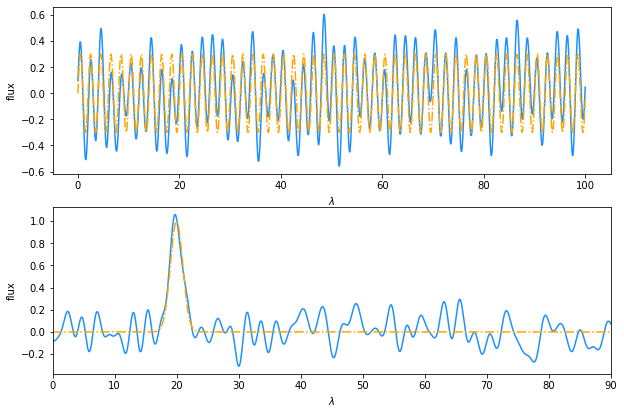

In [224]:
def low_pass(nu, nu_c):
    return np.piecewise(nu, [np.abs(nu) <= nu_c, np.abs(nu) > nu_c], [lambda nu: 1, lambda nu: 0])

freq = np.fft.fftfreq(N, dt)

fig = plt.figure(figsize=(10, 6.75))

ax = fig.add_subplot(211)

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('flux')

# ax.plot(t, hN2, '-', c='gray', label = 'signal + noise')
ax.plot(t, np.fft.ifft(low_pass(freq, 0.5)*np.fft.fft(hN2)), c = 'dodgerblue')
ax.plot(t, h2, label = 'signal', c = 'orange', ls = '-.')

ax = fig.add_subplot(212)

ax.plot(t, np.fft.ifft(low_pass(freq, 0.5)*(np.fft.fft(hN1))), c = 'dodgerblue')
ax.plot(t, h1, label = 'signal', c = 'orange', ls = '-.')

ax.set_xlim(0, 90)

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('flux')

plt.show()


### Problem 2: Optimal Filtering 

In the lecture, we discussed high pass and low pass filters. Another common filter you may encounter is the "Wiener Filter" which is an 'optimal filter' in the following sense. 

Suppose you have a signal you're interested in which we can call u(t). Rather than being a pure measurement of some underlying process, suppose u(t) is the product of a measurement made by some imperfect instrument with a response function u(t). The total observed signal is then the convolution of the signal we're interested in and the instrument response,

$$ 
s(t) = \int r(\tau) u(t-\tau) d\tau
$$

Let us also suppose, for complexity's sake, that the signal s(t) is not measured independent of noise contributions.That is, we want to infer u(t) from c(t), where 

$$
c(t) = s(t) + n(t) 
$$

where n(t) is some noise signal. How might we proceed? We want to find a filter that retains as much information from the original signal as possible while discarding information from the noise and deconvolving with respect to the instrument response. We can quantify our error in the least squares sense via

$$
\int | \tilde{u}(t) - u(t) |^2 dt = \int |\tilde{U}(f) - U(f)|^2 df 
$$

where the reconstructed signal is given by 

$$
\tilde{U}(f) = \frac{C(f) \Phi(f)}{R(f)}
$$

Minimizing the least squares error and plugging in all of the above expressions yields an 'optimal' filter:

$$
\Phi(f) = \frac{ |S(f)|^2 }{|S(f)|^2 + |N(f)|^2} 
$$

#### Part A) Why is this an optimal filter? Hint: In what limits does each term in the filter 'matter more'? 

#### Part B) Estimates of the Noise Power



#### Part C) Implementing a Wiener Filter on a Noisy Signal 

In [ ]:
def phi(Sf, Nf):
    return np

In [228]:
from scipy import optimize

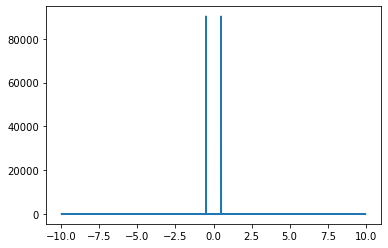

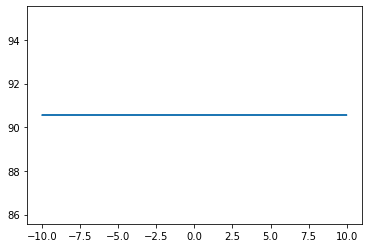

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


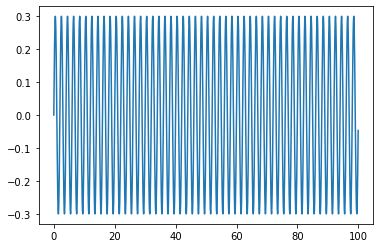

In [243]:
# compute the PSD of the input
N = len(t)
Df = 1. / N / (t[1] - t[0]) # dt? 
f = fftpack.ifftshift(Df * (np.arange(N) - N / 2)) # shifting to zero center? 

H = np.fft.fft(hN2)
PSD = abs(H)**2

amp_guess = np.max(PSD[1:])
width_guess = np.min(np.abs(f[PSD < np.mean(PSD[1:])]))
signal_params = (amp_guess, width_guess)

noise_params = (np.mean(PSD[1:]),)

def signal(x, A, width):
    width = abs(width) + 1E-99  # prevent divide-by-zero errors
    return A * np.exp(-0.5 * (x / width) ** 2)

def noise(x, n):
    return n * np.ones(x.shape)

    # use [1:] here to remove the zero-frequency term: we don't want to
    # fit to this for data with an offset.
def min_func(v): return np.sum((PSD[1:] - signal(f[1:], v[0], v[1]) - noise(f[1:], v[2])) ** 2)
v0 = tuple(signal_params) + tuple(noise_params)
v = optimize.minimize(min_func, v0, method='Nelder-Mead')['x']

# P_S = signal(f, v[0], v[1])
P_S = PSD
P_N = noise(f, v[2])
Phi = P_S / (P_S + P_N)
Phi[0] = 1  # correct for DC offset

# Use Phi to filter and smooth the values
h_smooth = fftpack.ifft(Phi * H)

plt.plot(f, P_S)
plt.show()
plt.plot(f, P_N)
plt.show()

plt.plot(t, h_smooth)

### Problem 3: Sampling and Aliasing

We saw in the lecture that signals can be reconstructed if they are sampled at rates greater than the Nyquist frequency. What happens if we sample at rates that are 'too low'? The answer is that power from frequencies too low to be captured by a given sampling rate is misidentified as coming from frequencies that are measured. Let's consider two similar functions,

$$
f(t) = \cos\left(\frac{3 \pi}{2} t\right) 
$$

and 

$$
g(t) = \cos\left(\frac{\pi}{2} t\right)
$$

For different numbers of samples. 

### Part a) Starting in the Time Domain, plot the functions f(t) and g(t) over the interval (-4, 4) for n = 9 samples and n = 18 samples. From your plot, make sure you understand why undersampling leads to aliasing. Explain the origin of the term 'aliasing'. How did I pick this interval and this number of samples?

Hint: The word alias is defined as "an assumed or additional name that a person sometimes uses"

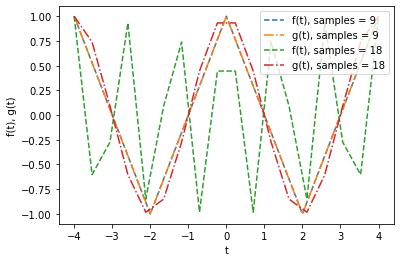

In [84]:
t1 = np.linspace(-4, 4, 9)
t2 = np.linspace(-4, 4, 18)

plt.plot(t1, np.cos(3*np.pi*t1/2), ls = '--', label = 'f(t), samples = 9')
plt.plot(t1, np.cos(np.pi*t1/2), ls = '-.', label = 'g(t), samples = 9')

plt.plot(t2, np.cos(3*np.pi*t2/2), ls = '--', label = 'f(t), samples = 18')
plt.plot(t2, np.cos(np.pi*t2/2), ls = '-.', label = 'g(t), samples = 18')

# plt.grid()
plt.xlabel('t')
plt.ylabel('f(t), g(t)')
plt.legend(loc = 'upper right')

### Part B) Let's now plot the Fourier Transforms of each signal. 

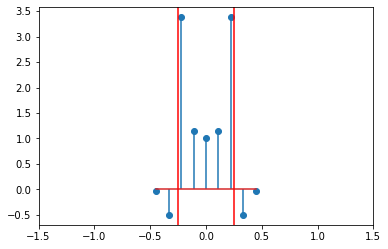

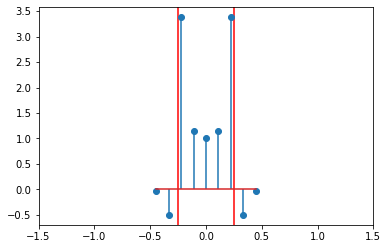

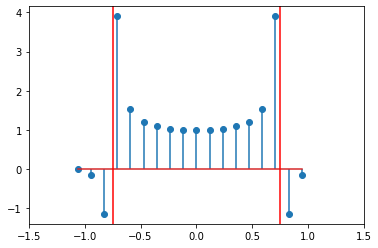

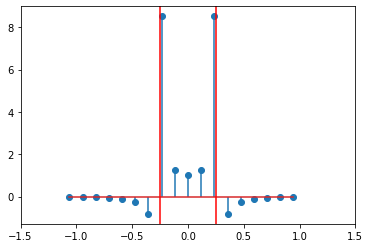

In [126]:
N1 = 9
N2 = 18

t1,dt1 = np.linspace(-4, 4, N1, retstep = True)
t2,dt2 = np.linspace(-4, 4, N2, retstep = True)

# dt1 = t1[1] - t1[0]
# dt2 = t2[1] - t2[0]

freq1 = np.fft.fftfreq(N1, dt1)
freq2 = np.fft.fftfreq(N2, dt2)

H1 = np.fft.fft(np.cos(3*np.pi*t1/2))
H2 = np.fft.fft(np.cos(np.pi*t1/2))

H3 = np.fft.fft(np.cos(3*np.pi*t2/2))
H4 = np.fft.fft(np.cos(np.pi*t2/2))

plt.stem(freq1, H1.real)

plt.axvline(1/4, color = 'red')
plt.axvline(-1/4, color = 'red')
plt.xlim(-1.5, 1.5)
plt.show()

plt.axvline(1/4, color = 'red')
plt.axvline(-1/4, color = 'red')
plt.stem(freq1, H2.real)
plt.xlim(-1.5, 1.5)

plt.show()


plt.stem(freq2, H3.real)
plt.axvline(3/4, color = 'red')
plt.axvline(-3/4, color = 'red')
plt.xlim(-1.5, 1.5)

plt.show()

plt.stem(freq2, H4.real)

plt.axvline(1/4, color = 'red')
plt.axvline(-1/4, color = 'red')
plt.xlim(-1.5, 1.5)

plt.show()